<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [61]:
# student_number = 401100528
# full_name = Amir Malekhosseini
# assert student_number and full_name is not None, 'please input your information'

In [62]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [63]:
data = pd.read_csv('dataset.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: 
<br>
CUST_ID.Because it represents a unique identifier for each customer.So it doesn't have a useful information for dimensionality reduction.

In [65]:
# Exclude irrelevant feature
updated_data = data.drop(columns=['CUST_ID'])
updated_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer: 
<br>
We can fill the missing data with mean. This is helpful because it doesn't change data distribution 

In [66]:
#Fill missing data
updated_data = updated_data.fillna(updated_data.mean())
updated_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


plot the correlation matrix and identify redundant features.remove them from the dataframe.

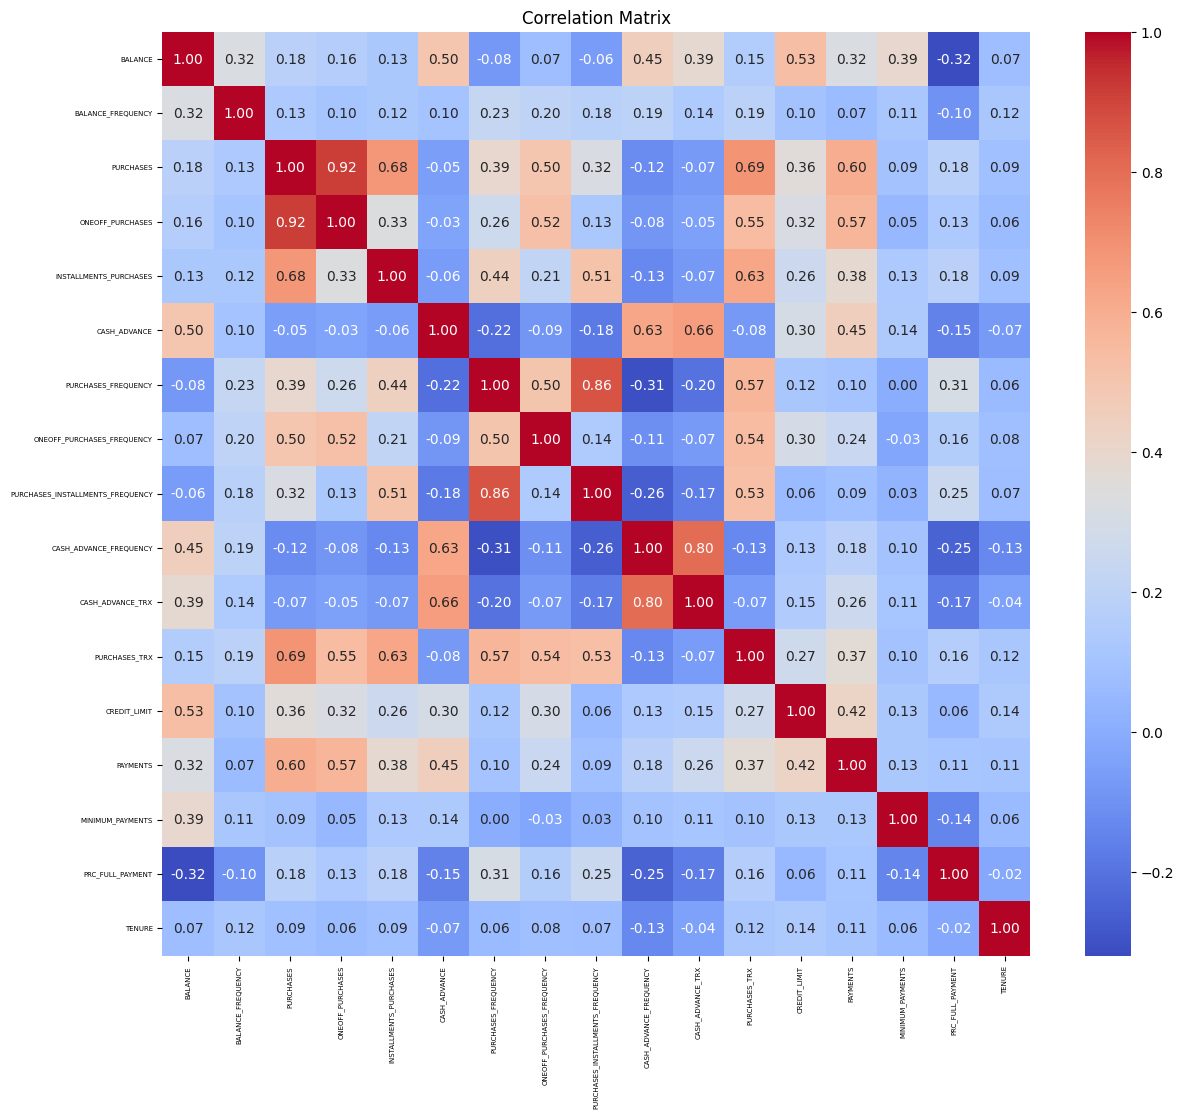

In [67]:
# Plot the correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = updated_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [68]:
# Identify and remove redundant features. use 0.8 threshold.
threshold = 0.8
redundant_features = set()

# Loop through the correlation matrix and find feature pairs with high correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            redundant_features.add(correlation_matrix.columns[i])

print("Redundant features:", redundant_features)
data = updated_data.drop(columns=redundant_features)

Redundant features: {'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [69]:
data = (data-data.mean()) / data.std()
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.349059,-0.466759,-0.806445,-0.678623,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.454551,2.605459,-1.221690,-0.678623,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,-0.454551,-0.466759,1.269772,2.673302,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,-0.454551,-0.368633,-1.014069,-0.399297,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,4.878032e-17,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.454551,-0.466759,-1.014069,-0.399297,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659


Why is it important to standardize the data before applying PCA?
<br>
Answer:
<br>
When components are based on standardized data, you can more easily understand how each original feature contributes to the principal components without the noise of differing scales.Also standardizing ensures that each feature contributes equally to the analysis.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:
<br>
We use Normalizer when we want to focus on the relative magnitudes of samples and the direction of the data points is critical.
We use StandardScaler when we want to ensure that features with different scales contribute equally to the analysis, making it the preferred choice for PCA.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [70]:
import numpy as np


class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        # eigenvectors
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        centered_X = X - self.mean

        covariance_matrix = np.cov(centered_X, rowvar=False)

        # Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.components = eigenvectors[:, sorted_indices]

        # If n_components is specified, keep only the top n_components
        if self.n_components is not None:
            self.components = self.components[:, :self.n_components]
            self.eigenvalues = self.eigenvalues[:self.n_components]

        # Calculate explained variance ratio
        self.explained_variance_ratio = self.eigenvalues / \
            np.sum(self.eigenvalues)

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X_centered = X - self.mean

        # Project the data onto the principal components
        return X_centered.dot(self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: 6


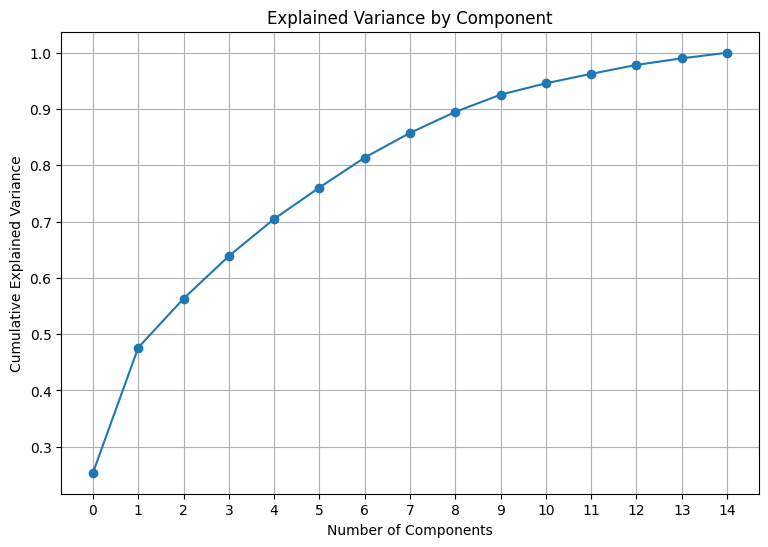

Number of components needed to explain at least 75% of the variance: 6


In [71]:
pca = CustomPCA(n_components=None)
pca.fit(data)

explained_variance_ratio = pca.get_explained_variance_ratio()
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(9, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(len(cumulative_variance)))
plt.grid()
plt.show()

n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
print(
    f'Number of components needed to explain at least 75% of the variance: {n_components_75}')

Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [136]:
# Build a new DataFrame with the first selected components

pca = CustomPCA(n_components=5)
pca.fit(data)

data_transformed = pca.transform(data)

# Convert the transformed data into a DataFrame
df_pca = pd.DataFrame(data_transformed, columns=[f'PC{i+1}' for i in range(data_transformed.shape[1])])

data_transformed.to_csv('pca_output.csv', index=False)
data_transformed.head()

,0,1,2,3,4
0,1.728445,0.833399,-0.384341,-0.429873,-0.118064
1,0.312817,-2.531396,0.615239,-0.912400,-0.845016
2,-1.197251,0.883755,-1.177843,1.172885,-1.072825
3,0.904702,-0.002158,-0.236389,-1.354761,-0.441473
4,1.498527,0.526750,-0.787647,-0.088651,-0.275021


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

Correlation Matrix:
               0             1             2             3             4
0  1.000000e+00  4.987847e-16 -2.081044e-16  1.064238e-16  4.239688e-17
1  4.987847e-16  1.000000e+00 -2.904330e-17  2.900141e-16 -1.045515e-16
2 -2.081044e-16 -2.904330e-17  1.000000e+00  6.420657e-17 -3.426942e-16
3  1.064238e-16  2.900141e-16  6.420657e-17  1.000000e+00 -1.841512e-16
4  4.239688e-17 -1.045515e-16 -3.426942e-16 -1.841512e-16  1.000000e+00


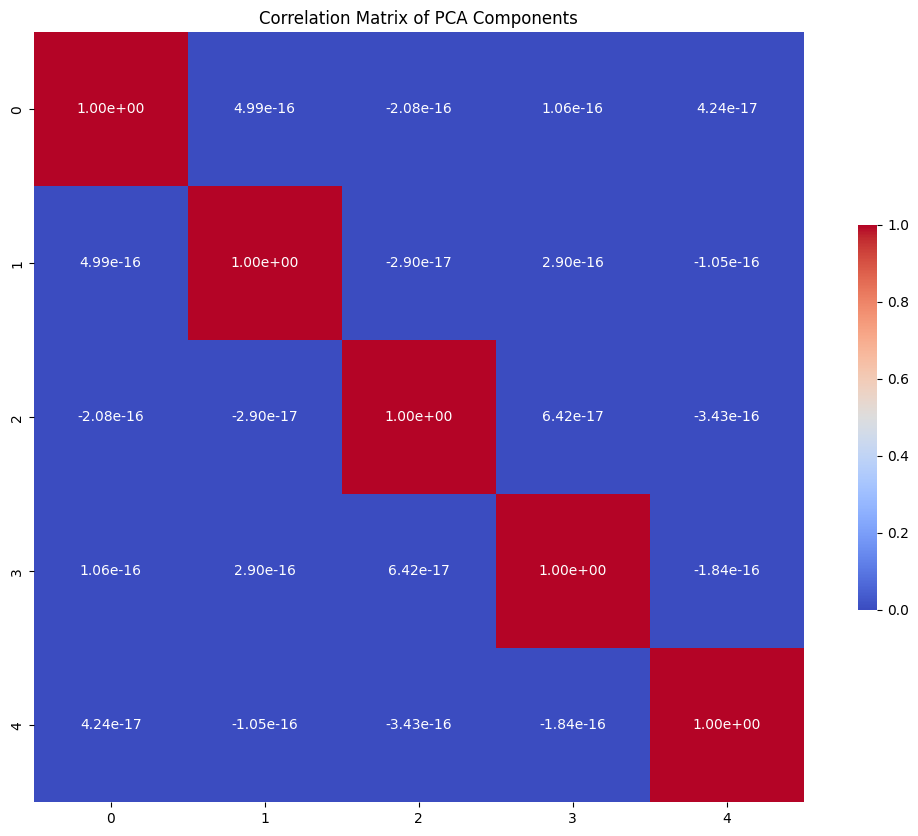

In [73]:
correlation_matrix = data_transformed.corr()

print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2e",
            cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of PCA Components')
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [76]:
import numpy as np


class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=14):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        # To store the inertia (within-cluster sum of squares)
        self.inertia_ = None
        # To store the label assigned to each data point (cluster assignment)
        self.labels_ = None

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        if hasattr(X, 'to_numpy'):
            X = X.to_numpy()

        # Initialize centroids randomly from the data points
        initial = np.random.choice(
            n_samples, self.n_clusters, replace=False)
        self.centroids = X[initial]

        for _ in range(self.max_iter):
            
            self.labels_ = np.argmin(np.linalg.norm(
                X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            new_centroids = np.array(
                [X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])

            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        inertia = 0
        for j in range(self.n_clusters):
            cluster_points = X[self.labels_ == j]
            inertia += np.sum((cluster_points - self.centroids[j]) ** 2)
        return inertia
    

### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [99]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Assuming X_pca is your PCA-transformed data
data_transformed_np=data_transformed.to_numpy()
# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 14
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=14)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(data_transformed)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

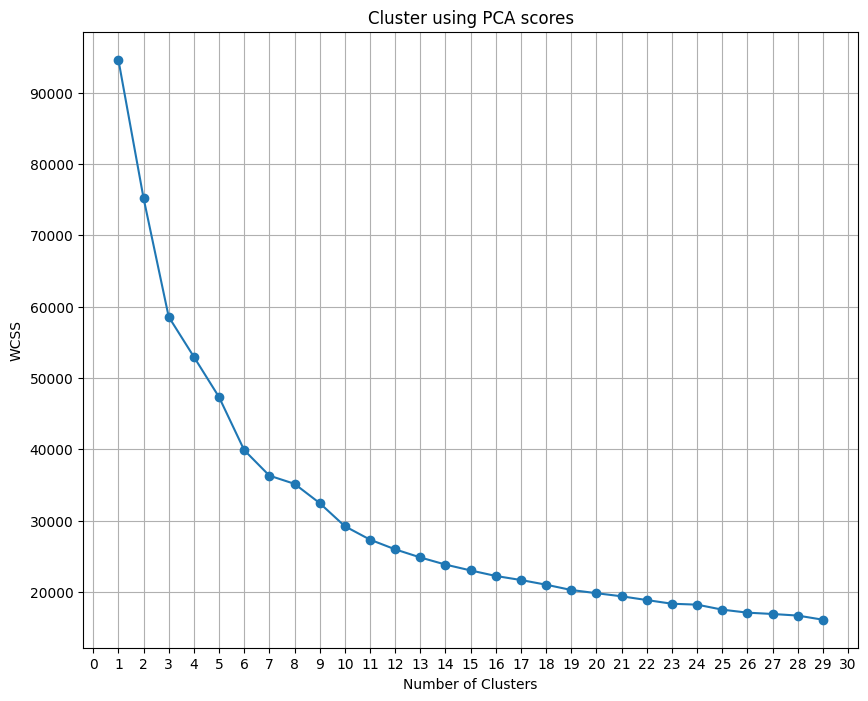

In [109]:
# Plot the Elbow curve using Matplotlib

plt.figure(figsize=(10, 8))
plt.plot(range(1, 30), WCSS, marker='o')
plt.title('Cluster using PCA scores')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(0, 31))
plt.grid()
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [131]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
optimal_clusters = 6

kmeans_optimal = CustomKMeans(n_clusters=optimal_clusters, random_state=14)
kmeans_optimal.fit(data_transformed)

In [133]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
data_transformed['segment'] = kmeans_optimal.labels_
data_transformed.head()

,0,1,2,3,4,segment
0,1.728445,0.833399,-0.384341,-0.429873,-0.118064,4
1,0.312817,-2.531396,0.615239,-0.912400,-0.845016,5
2,-1.197251,0.883755,-1.177843,1.172885,-1.072825,2
3,0.904702,-0.002158,-0.236389,-1.354761,-0.441473,1
4,1.498527,0.526750,-0.787647,-0.088651,-0.275021,3


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

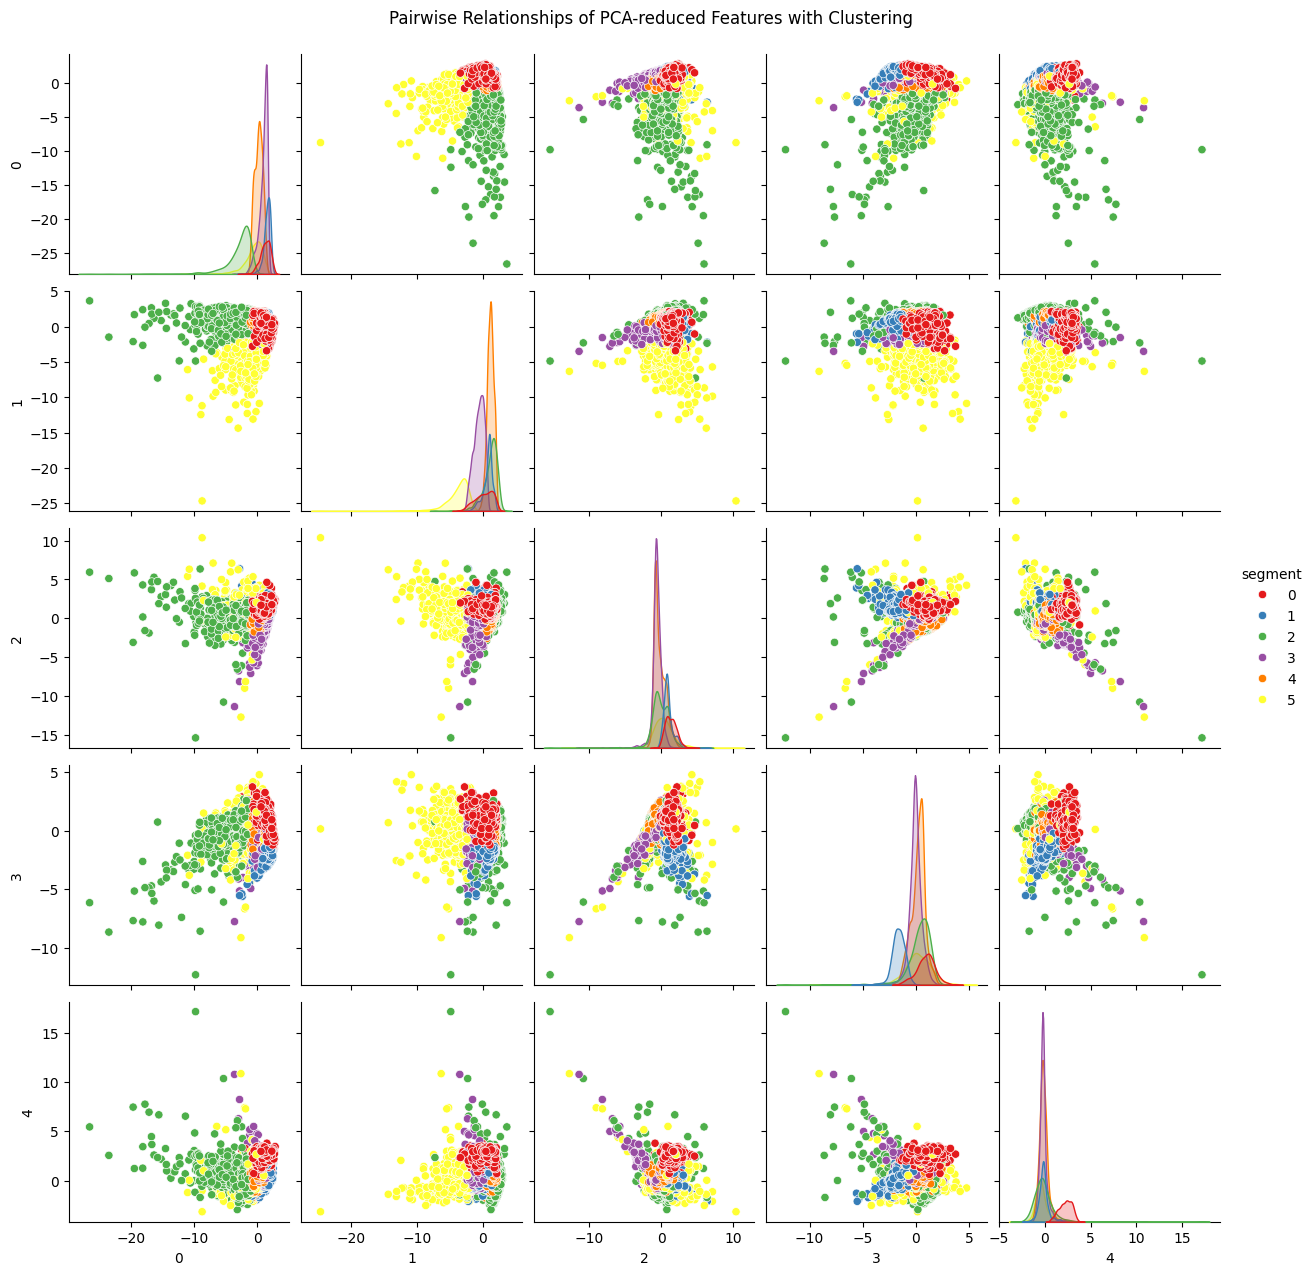

In [134]:
sns.pairplot(data_transformed, hue='segment', palette='Set1',markers='o', diag_kind='kde', height=2.5)
plt.suptitle(
    'Pairwise Relationships of PCA-reduced Features with Clustering', y=1.02)
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


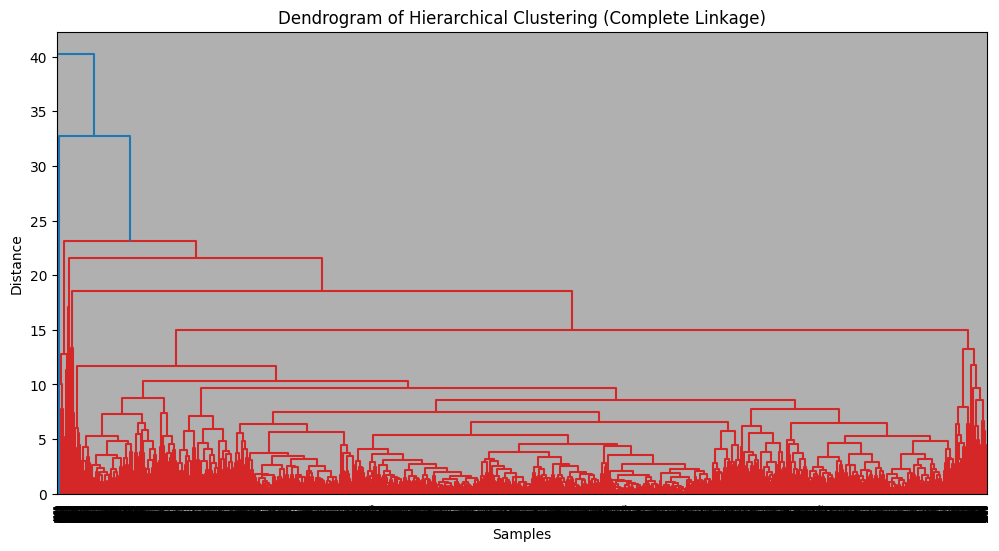

In [137]:
# Perform hierarchical clustering using complete linkage
linked = linkage(data_transformed, method='complete')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=df_pca.index,
           distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram of Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid()
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

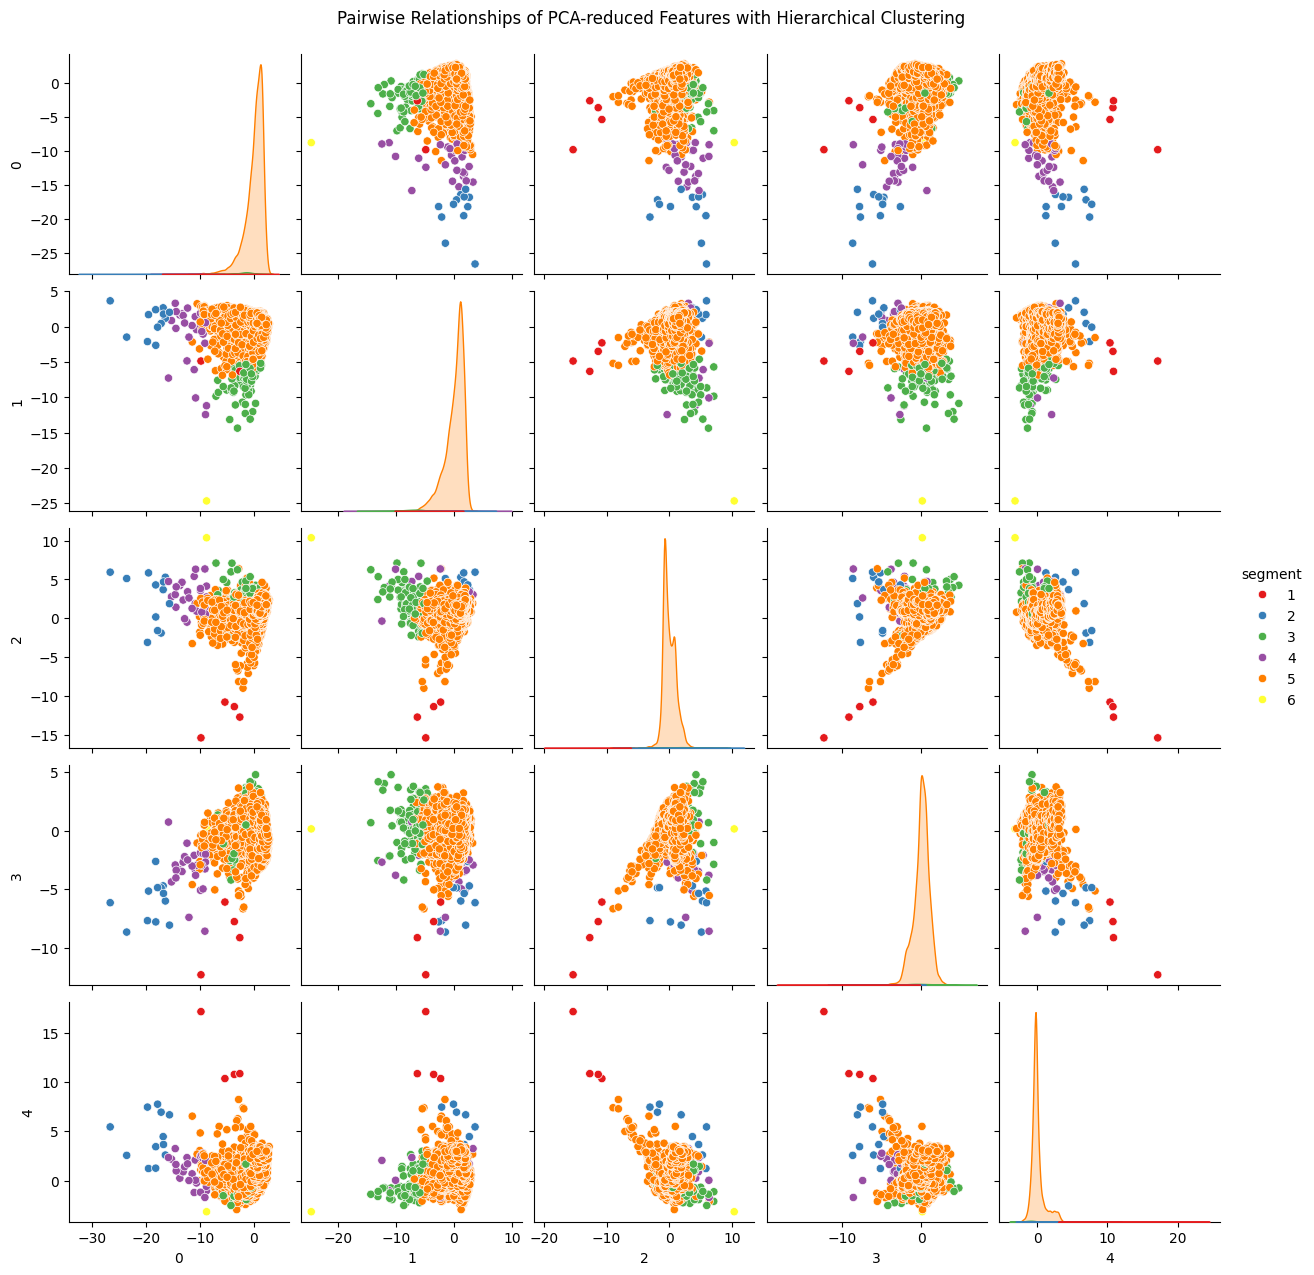

,0,1,2,3,4,segment
0,1.728445,0.833399,-0.384341,-0.429873,-0.118064,5
1,0.312817,-2.531396,0.615239,-0.912400,-0.845016,5
2,-1.197251,0.883755,-1.177843,1.172885,-1.072825,5
3,0.904702,-0.002158,-0.236389,-1.354761,-0.441473,5
4,1.498527,0.526750,-0.787647,-0.088651,-0.275021,5


In [143]:
data_transformed['segment'] = fcluster(linked, 6, criterion='maxclust')

sns.pairplot(data_transformed, hue='segment', palette='Set1',
             markers='o', diag_kind='kde', height=2.5)
plt.suptitle(
    'Pairwise Relationships of PCA-reduced Features with Hierarchical Clustering', y=1.02)
plt.show()
data_transformed.head()